#**Activation Functions in Code**

In this notebook, I explicitly write out the equations for various activation functions, to make explicit what they do...

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#*Identity / Linear* 

The identity activation function isn't really an activation at all; it's just a pass-through. This isn't useful for much, because it does not introduce any non-linearity. A neural network that relies on this activation is just a fancy linear regression.

Otherwise known as an identity activtion; y = f(x):



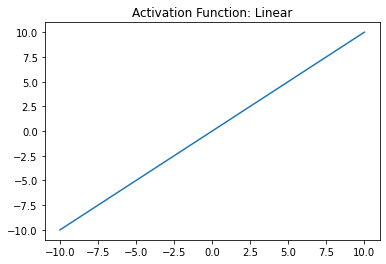

In [2]:
def linear(x):
  print("Otherwise known as an identity activtion; y = f(x):\n")
  return x

x = np.linspace(-10, 10)
plt.plot(x, linear(x))
plt.axis('tight')
plt.title('Activation Function: Linear')
plt.show()

#*Binary Step*

This was the original activation function that people worked with in neural networks; **binaryStep(x*w+z)** yields a perceptron. These generally aren't used anymore because they yield a very unstable network, which makes it very difficult for the network to learn.

Returns '0' if the input is less then zero, else one:



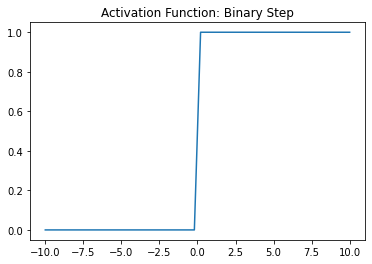

In [3]:
def binaryStep(x):
  print("Returns '0' if the input is less then zero, else one:\n")
  return(np.where(x < 0, 0, 1))

x = np.linspace(-10, 10)
plt.plot(x, binaryStep(x))
plt.axis('tight')
plt.title('Activation Function: Binary Step')
plt.show()

#*Sigmoid*

When neural networks first started to offer real value, they were implemented with sigmoid activations. Technically, this is a specific type of sigmoid function, namely a logistic function. The output is a continuous value between 0 and 1, exclusive. The resulting neuron is very similar to a logistic regression. This activation function suffers from the vanishing gradient problem (as we approach 0 or 1, the gradient plateaus, such that it becomes difficult to figure out where to go next). 

Returns 1/(1+exp(-x)), an inverse logit tranasformation (a.k.a. logistic):



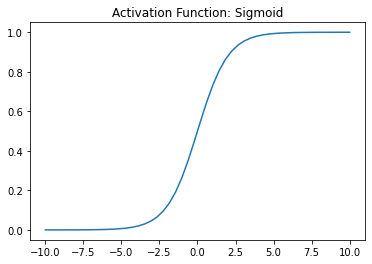

In [4]:
def sigmoid(x):
  print("Returns 1/(1+exp(-x)), an inverse logit tranasformation (a.k.a. logistic):\n")
  return 1/(1+np.exp(-x))
  
x = np.linspace(-10, 10)
plt.plot(x, sigmoid(x))
plt.axis('tight')
plt.title('Activation Function: Sigmoid')
plt.show()

#*Hyperbolic Tangent*

The hyperbolic tangent function came next. This is another type of sigmoid function. People realized, based on empirical experimentation, that centering the output of neurons around 0 results in faster convergence. The reason for this is likely similar to why we gain efficiency from whitening input data in some NN prediction tasks (decorrelating input features and standardizing them with a 0-mean). This is just a transformed logistic function, so it also suffers from the vanishing gradient problem.

Returns the hyperbolic tangent:



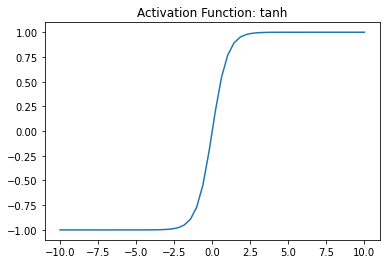

In [5]:
def tanh(x):
  print("Returns the hyperbolic tangent:\n")
  return((1-np.exp(-2*x))/(1+np.exp(-2*x)))

x = np.linspace(-10, 10)
plt.plot(x, tanh(x))
plt.axis('tight')
plt.title('Activation Function: tanh')
plt.show()

#*Rectified Linear Unit (ReLU)*

Next came the ReLU. This is a piece-wise linear function. It yields the identity transformation if x >= 0, and 0 if x < 0. This function is easier to work with, resulting in lower computational burden, which is good for large networks. Empirically, it works well with sparse inputs (lots of 0s), and it suffers less from the vanishing gradient problem.

Returns the ReLU transformation:



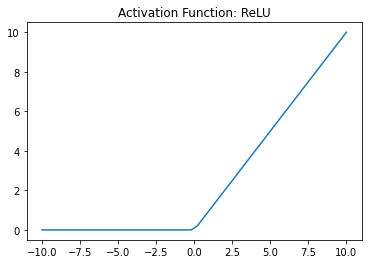

In [6]:
def relu(x):
  print("Returns the ReLU transformation:\n")
  return(np.where(x<0,0,x))

x = np.linspace(-10, 10)
plt.plot(x, relu(x))
plt.axis('tight')
plt.title('Activation Function: ReLU')
plt.show()

#*Leaky ReLU*

This activation function introduces a small positive slope for negative values, rather than a 0. It can be more effective for extremely sparse data. Empirically works well with GANs, for example. The slope on negative values is a hyper-parameter (it's not learned).

Returns the ReLU transformation:



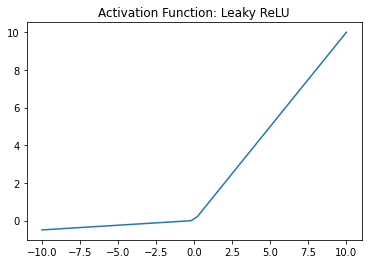

In [7]:
def leakyRelu(x):
  print("Returns the ReLU transformation:\n")
  return(np.where(x<0,x*0.05,x))

x = np.linspace(-10, 10)
plt.plot(x, leakyRelu(x))
plt.axis('tight')
plt.title('Activation Function: Leaky ReLU')
plt.show()

#*Softmax*

This is essentially a multi-category analog of a logistic (sigmoid) activation. It yields a multi-valued output (e.g., a vector). This activation is generally only ever used in the output layer, for multi-category classification problems (e.g., identifying digits between 0-9 in the MNIST dataset). This means your target variable is a one-hot encoding of label classes. You will recognize it related to multinomial logistic regression. The name, Softmax, refers to the fact that it's a 'soft' version of the argmax function. Recall that argmax() yields the index of maximal value in a vector. Softmax yields continuous values that range from 0-1 that can roughly be thought of as probabilities, with the expectation that you will probably want to choose the maximal element (e.g., for class prediction), though this is not always the case (e.g., see word2vec). All this activation does is transform a vector of real-valued inputs into a vector of outputs that has equal shape, but transformed values. The most negative values end up smallest, and most positive end up biggest.

In [8]:
def softmax(wx):
  print("Returns transformation of vector elements = exp(wx[i]) / sum_i_N(exp(wx[i])):")
  return(np.exp(wx)/np.exp(wx).sum())

# So, x represents a vector of values, with each element being the scalar result of x*w (x = outputs from prior nodes, w = weights into a particular softmax node)
wx = np.random.rand(10,1)*10-5
print("Input vector is:\n", wx,"\n")
result = softmax(x)
print(result,"\n")

print("These values will add up:")
print(result.sum())

Input vector is:
 [[-2.29796466]
 [-0.98436716]
 [-4.4157323 ]
 [ 0.085918  ]
 [ 2.42452212]
 [ 3.76687352]
 [ 2.42779409]
 [-4.36105415]
 [-0.58109886]
 [ 4.93580047]] 

Returns transformation of vector elements = exp(wx[i]) / sum_i_N(exp(wx[i])):
[6.90753755e-10 1.03893005e-09 1.56260555e-09 2.35024110e-09
 3.53488647e-09 5.31665554e-09 7.99653013e-09 1.20272027e-08
 1.80895468e-08 2.72076317e-08 4.09217119e-08 6.15484113e-08
 9.25720542e-08 1.39233248e-07 2.09414143e-07 3.14969907e-07
 4.73731339e-07 7.12516900e-07 1.07166297e-06 1.61183758e-06
 2.42428867e-06 3.64625792e-06 5.48416407e-06 8.24847178e-06
 1.24061363e-05 1.86594827e-05 2.80648454e-05 4.22110066e-05
 6.34875784e-05 9.54886638e-05 1.43619983e-04 2.16012023e-04
 3.24893466e-04 4.88656895e-04 7.34965723e-04 1.10542718e-03
 1.66262074e-03 2.50066921e-03 3.76113828e-03 5.65695019e-03
 8.50835121e-03 1.27970086e-02 1.92473754e-02 2.89490669e-02
 4.35409222e-02 6.54878417e-02 9.84971652e-02 1.48144927e-01
 2.22817778e-01 3.3